# Predicting Google Play Store App Ratings

In [1]:
# Package importing
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras import Sequential
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

### Data preprocessing

Note: This section is completely optional to run if using the google_reviews_summary.csv file. The following code blocks are responsible for creating this file and take some time to run.

In [2]:
# Reading in the cleaned datasets
summary = pd.read_csv('googlePS_cleaned.csv')
reviews = pd.read_csv('google_reviews_cleaned.csv')

In [3]:
# Integer encoding categorical variables
label = LabelEncoder()

summary['Type'] = label.fit_transform(summary['Type'])
summary['Category'] = label.fit_transform(summary['Category'])
summary['Content Rating'] = label.fit_transform(summary['Content Rating'])
summary['Genres'] = label.fit_transform(summary['Genres'])
summary['Android Ver'] = label.fit_transform(summary['Android Ver'])

reviews['Sentiment'] = label.fit_transform(reviews['Sentiment'])

# Mapping summary data to text review data

## Creating new columns in review database
reviews['Category'] = ''
reviews['Size'] = ''
reviews['Type'] = ''
reviews['Price'] = ''
reviews['Content Rating'] = ''
reviews['Genres'] = ''
reviews['Android Ver'] = ''

for row in reviews.index:
    appInfo = [None] * 8    # Empty list to hold app information, will hold 8 values max
    a = reviews.loc[row, 'App']    # Gets the name of the app from the review dataset
    
    if appInfo[0] == a:    # Checks to see if we already have the rating for the current app
        # Adds relevant information to respective column
        reviews.loc[row, 'Category'] = appRating[1]
        reviews.loc[row, 'Size'] = appInfo[2]
        reviews.loc[row, 'Type'] = appInfo[3]
        reviews.loc[row, 'Price'] = appInfo[4]
        reviews.loc[row, 'Content Rating'] = appInfo[5]
        reviews.loc[row, 'Genres'] = appInfo[6]
        reviews.loc[row, 'Android Ver'] = appInfo[7]
    
    elif summary['App'].eq(a).any():    # Checks to see if the app name is present in the original dataframe
        index = summary[summary['App'] == a].index.values[0]    # Gets the index of the app name
        
        # Saves all relevant information for future and adds information to respective column
        
        appInfo[0] = row
        
        appInfo[1] = summary.loc[index, 'Category']
        reviews.loc[row, 'Category'] = appInfo[1]
        
        appInfo[2] = summary.loc[index, 'Size']
        reviews.loc[row, 'Size'] = appInfo[2]
        
        appInfo[3] = summary.loc[index, 'Type']
        reviews.loc[row, 'Type'] = appInfo[3]
        
        appInfo[4] = summary.loc[index, 'Price']
        reviews.loc[row, 'Price'] = appInfo[4]
        
        appInfo[5] = summary.loc[index, 'Content Rating']
        reviews.loc[row, 'Content Rating'] = appInfo[5]
        
        appInfo[6] = summary.loc[index, 'Genres']
        reviews.loc[row, 'Genres'] = appInfo[6]
        
        appInfo[7] = summary.loc[index, 'Android Ver']
        reviews.loc[row, 'Android Ver'] = appInfo[7]
        
    else:
        reviews.loc[row, 'Category'] = None    # Sets category value to null if app cannot be found. df.dropna will remove all rows with a single null value
        
reviews = reviews.dropna()    # Removes reviews if no valid app score was found

In [4]:
# Removing irrelevant columns
reviews = reviews.drop(columns = ['App', 'Translated_Review', 'Review'])

In [5]:
# Saving the newly cleaned data
reviews.to_csv('google_reviews_summary.csv', index=False)

### Model Creation

In [6]:
# Load in cleaned data
df = pd.read_csv('google_reviews_summary.csv')

# Should display 11 columns with 24,041 entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24041 entries, 0 to 24040
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sentiment               24041 non-null  int64  
 1   Sentiment_Polarity      24041 non-null  float64
 2   Sentiment_Subjectivity  24041 non-null  float64
 3   Rating                  24041 non-null  float64
 4   Category                24041 non-null  int64  
 5   Size                    24041 non-null  float64
 6   Type                    24041 non-null  int64  
 7   Price                   24041 non-null  float64
 8   Content Rating          24041 non-null  int64  
 9   Genres                  24041 non-null  int64  
 10  Android Ver             24041 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 2.0 MB


In [7]:
# Converting int columns to floats for model
df['Sentiment'] = df['Sentiment'].astype(float)
df['Category'] = df['Category'].astype(float)
df['Type'] = df['Type'].astype(float)
df['Content Rating'] = df['Content Rating'].astype(float)
df['Genres'] = df['Genres'].astype(float)
df['Android Ver'] = df['Android Ver'].astype(float)

In [17]:
# Splitting original data into training and test data with 80:20 split
seed = 684093

# Variable to be predicted
y = df['Rating'].copy()
# Variables used for prediction
x = df.drop(columns = ['Rating'])

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = seed)

In [18]:
# Defining our model
# Uses TensorFlow Sequential model
model = Sequential([
    # Input Layer (10 predictor variables)
    layers.Dense(10, input_dim = 10, kernel_initializer = 'normal', activation = 'relu'),
    
    # Hidden Layers
    layers.Dense(400, activation = 'relu'),
    layers.Dense(400, activation = 'sigmoid'),
    layers.Dense(400, activation = 'relu'),
    
    # Output Layer
    layers.Dense(1, activation = 'linear')
])

# Compiling the model
model.compile(optimizer = 'adam',
              loss='mean_squared_error')    # Regression problems require mean squared error to correctly gauge accuracy

In [19]:
# Training the model
model.fit(x_train, y_train, epochs=200)

Epoch 1/200
601/601 [==============================] - 1s 2ms/step - loss: 0.1694
Epoch 2/200
601/601 [==============================] - 1s 2ms/step - loss: 0.1003
Epoch 3/200
601/601 [==============================] - 1s 2ms/step - loss: 0.0935
Epoch 4/200
601/601 [==============================] - 1s 2ms/step - loss: 0.0892
Epoch 5/200
601/601 [==============================] - 1s 2ms/step - loss: 0.0858
Epoch 6/200
601/601 [==============================] - 1s 2ms/step - loss: 0.0853
Epoch 7/200
601/601 [==============================] - 1s 2ms/step - loss: 0.0805
Epoch 8/200
601/601 [==============================] - 1s 2ms/step - loss: 0.0800
Epoch 9/200
601/601 [==============================] - 1s 2ms/step - loss: 0.0767
Epoch 10/200
601/601 [==============================] - 1s 2ms/step - loss: 0.0764
Epoch 11/200
601/601 [==============================] - 1s 2ms/step - loss: 0.0736
Epoch 12/200
601/601 [==============================] - 1s 2ms/step - loss: 0.0712
Epoch 13/200


In [15]:
# Model performance
test_loss = model.evaluate(x_test, y_test, verbose = True) 

151/151 [==============================] - 0s 709us/step - loss: 0.0031


151/151 [==============================] - 0s 636us/step


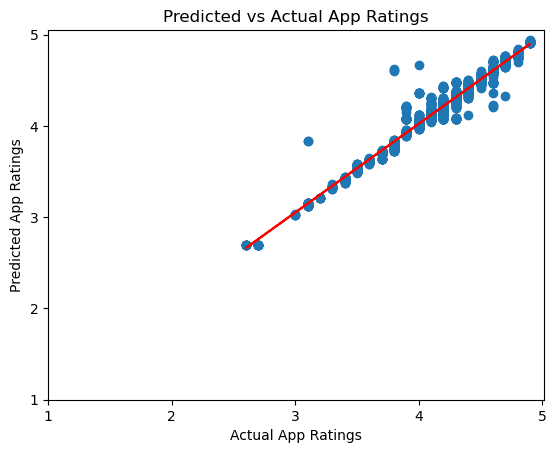

Slope [0.97271695]


In [16]:
# Plotting app rating predictions
import matplotlib.pyplot as plt
%matplotlib inline

# Creating the model predictions
y_pred = model.predict(x_test)
# Slope and intercept for line of best fit
a, b = np.polyfit(y_test, y_pred, deg = 1)

# Plotting predictions vs. actual app ratings
plt.scatter(y_test, y_pred)
# Line of best fit
plt.plot(y_test, a*y_test+b, color='red')
# X and Y axis scale
plt.xticks([1,2,3,4,5])
plt.yticks([1,2,3,4,5])
# Graph labels
plt.xlabel('Actual App Ratings')
plt.ylabel('Predicted App Ratings')
plt.title('Predicted vs Actual App Ratings')
plt.show()

# Print out slope value
print('Slope', a)